Having created a file with Gaia/PS1 photometry with notebook LSST-Bright-Gaia-PS1-Query, we will now do out analysis and make plots!


In [91]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [92]:
plt.rcParams['figure.figsize'] = [12, 8]

In [93]:
from astropy.table import Table
from astropy.modeling import models, fitting
#filename='LSST-Gaia-PS1-12-20-100.fits'
filename='LSST-Gaia-PS1-12-20-30000.fits'
results = Table.read(filename)

In [94]:
#one bad thing is that the no data fields become 1e20. 

In [95]:
results


source_id,ra,dec,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_rp_mean_mag,bp_rp,phot_bp_rp_excess_factor,bp_g,g_rp,l,b,g_mean_psf_mag,r_mean_psf_mag,i_mean_psf_mag,z_mean_psf_mag,y_mean_psf_mag
,deg,deg,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mag,mag,mag,,mag,mag,deg,deg,,mag,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64
2951163636442230784,98.18693877927126,-14.599466356348588,20.00074654032046,0.1555286,128.59851,73.60631,73.60466066315809,0.14500062,0.4919917278110056,0.17240484,18.130836,16.661196,4.202551,1.6880682,2.7329102,1.4696407,223.9837901917888,-10.666597578547558,nan,20.3194007873535,17.5398006439209,16.2845993041992,15.6556997299194
3515271817986511232,188.7425978359606,-20.99250650094384,20.001115376344647,0.16966978,117.8826,75.76519,35.076799351630974,0.19291581,-67.15639661746283,0.1433008,18.169964,16.658394,4.0221024,1.7655358,2.5105324,1.51157,297.78033301709223,41.71446509869389,21.2217998504639,20.0009002685547,17.6025009155273,16.2950992584229,15.601300239563
4141663734072512768,260.39122331005757,-12.782594776599801,20.001938707573746,1.1397866,17.548845,5.5083575,-1.1348192400575505,1.3309585,-5.390193709680701,0.9024549,19.879696,18.255968,2.0154362,2.3836079,0.39170837,1.6237278,10.78161568435822,13.344831286041432,20.5016994476318,19.5249004364014,18.775899887085,18.3946990966797,18.1546993255615
4876066406825047296,76.23398062826196,-30.201885966809108,20.00212939154184,0.117627256,170.04672,249.63976,182.8552915221926,0.10561667,-169.95278161813235,0.1340825,18.365784,17.70086,1.1687908,1.2325274,0.5038662,0.6649246,232.2669547678809,-35.03628547505881,19.0007991790771,18.3202991485596,18.0419006347656,nan,17.752799987793
4146095487521526528,272.9081755140764,-14.892772690507401,20.002417107654054,1.0131085,19.743608,11.506731,-11.374835486760869,1.0902945,-1.7372353558010853,0.6909698,19.914135,17.91487,2.413847,3.149141,0.4145813,1.9992657,15.17137780115513,1.8017153780729,21.4428005218506,19.6800994873047,18.6515998840332,17.9479999542236,17.3593997955322
4120135536940113792,266.25772873380436,-18.899568112029428,20.002599852487965,1.8140855,11.026272,19.872498,-19.85150695122707,1.2912174,0.9131447307897651,0.93083614,19.664116,18.638517,1.5158348,1.5442733,0.49023628,1.0255985,8.518250255839646,5.329220931521818,20.6718997955322,19.6291999816895,19.0004997253418,18.6551990509033,18.4990997314453
6248604471338023296,239.13781895493466,-18.129351813716546,20.003713379131913,0.19659434,101.75121,205.88927,-31.884164728821556,0.24606046,-203.40547550375368,0.144195,18.341887,16.785631,4.51198,1.8125353,2.9557247,1.5562553,352.92581719943365,26.2761603611486,21.826000213623,20.4733009338379,17.7192001342773,16.4365005493164,nan
4161505967590470784,265.5344893237738,-13.368032306659332,20.00375183493615,3.4840684,5.7414923,8.814731,-8.809272228932446,2.3664215,-0.31016324889114444,2.0677264,20.79424,19.653309,1.5727081,1.6911409,0.43177605,1.1409321,12.94087080368439,8.767422150307828,nan,nan,20.0200996398926,19.8418998718262,nan


Text(0, 0.5, 'dec (deg ICRS)')

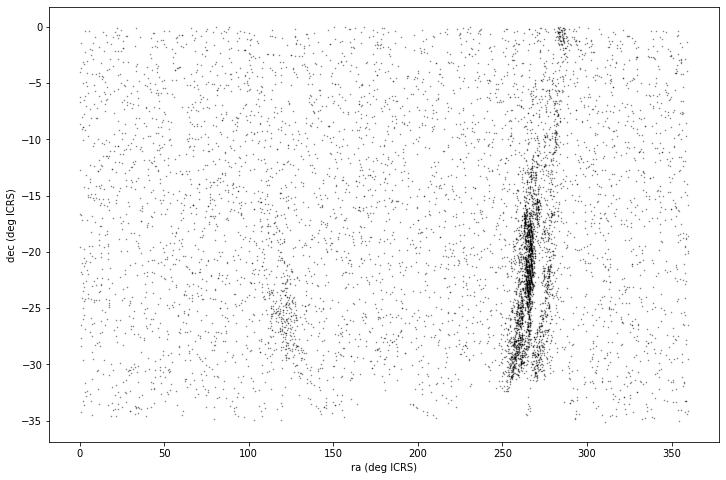

In [96]:
#Let's look at position on the sky, just to check
ra=results['ra']
dec=results['dec']

plt.plot(ra,dec, 'ko',alpha=0.5,markersize=0.5)
plt.xlabel('ra (deg ICRS)')
plt.ylabel('dec (deg ICRS)')

Our query limited to 300,000 in this case has selected (apparently) random sources . The galactic planes is obvious with many more sources. The next plot shows this in galactic coordinates:

Text(0, 0.5, 'b (deg Galactic)')

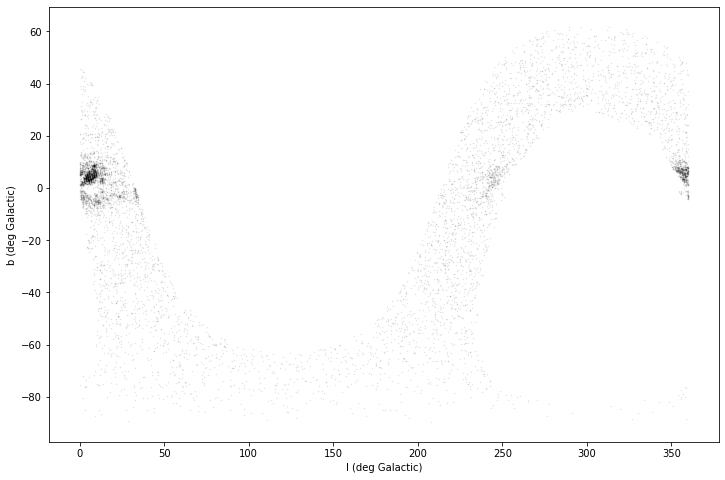

In [97]:
l=results['l']
b=results['b']

plt.plot(l,b, 'ko',alpha=0.1,markersize=0.5)
plt.xlabel('l (deg Galactic)')
plt.ylabel('b (deg Galactic)')

In [98]:
dm = 5.0*np.log10(1000.0/results['parallax'])-5.0
absmag_g = results['g_mean_psf_mag']-dm
absmag_r = results['r_mean_psf_mag']-dm
absmag_i = results['i_mean_psf_mag']-dm
absmag_z = results['z_mean_psf_mag']-dm
absmag_y = results['y_mean_psf_mag']-dm
absmag_GAIA=results['phot_g_mean_mag']-dm
col_gi = results['g_mean_psf_mag'] - results['i_mean_psf_mag']
col_ri = results['r_mean_psf_mag'] - results['i_mean_psf_mag']
col_iz = results['i_mean_psf_mag'] - results['z_mean_psf_mag']
col_iy = results['i_mean_psf_mag'] - results['y_mean_psf_mag']
mag_g=results['g_mean_psf_mag']
mag_r=results['r_mean_psf_mag']
mag_i=results['i_mean_psf_mag']
mag_z=results['z_mean_psf_mag']
mag_y=results['y_mean_psf_mag']

In [99]:
len(results)

7846

In [100]:
max_cutoff_volume=(50**3)*(2.0/3.0)*(np.pi)

tot_density=30000/max_cutoff_volume

#density_g=absmag_g/cutoff_volume
#density_r=absmag_r/cutoff_volume
#density_i=absmag_i/cutoff_volume
#density_z=absmag_z/cutoff_volume
#density_y=absmag_y/cutoff_volume

#plt.plot(density_g,col_gi)

Text(0, 0.5, '# of Objects')

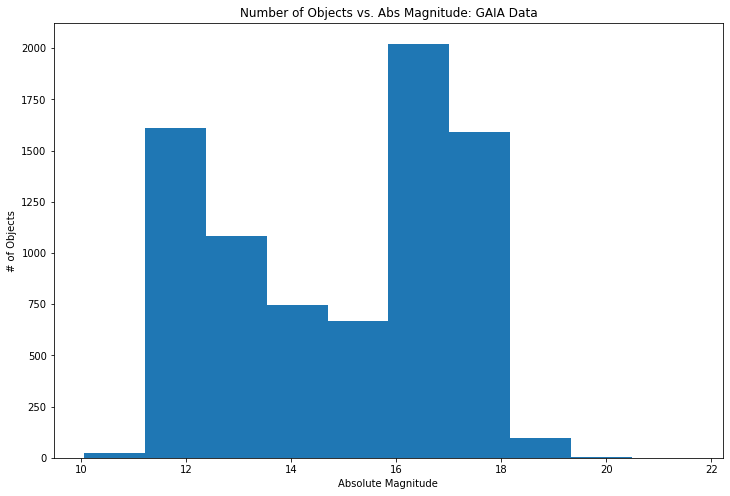

In [101]:
plt.hist(absmag_GAIA)
plt.title('Number of Objects vs. Abs Magnitude: GAIA Data')
plt.xlabel('Absolute Magnitude')
plt.ylabel('# of Objects')

Text(0, 0.5, '# of Objects')

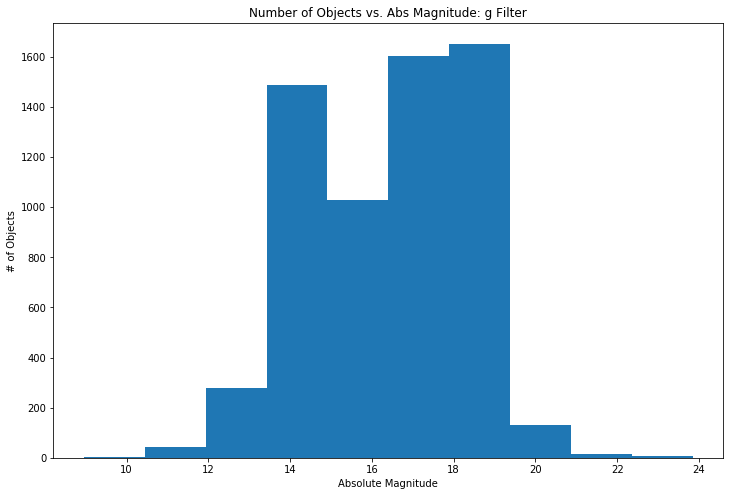

In [102]:
plt.hist(absmag_g)
plt.title('Number of Objects vs. Abs Magnitude: g Filter')
plt.xlabel('Absolute Magnitude')
plt.ylabel('# of Objects')

Text(0, 0.5, '# of Objects')

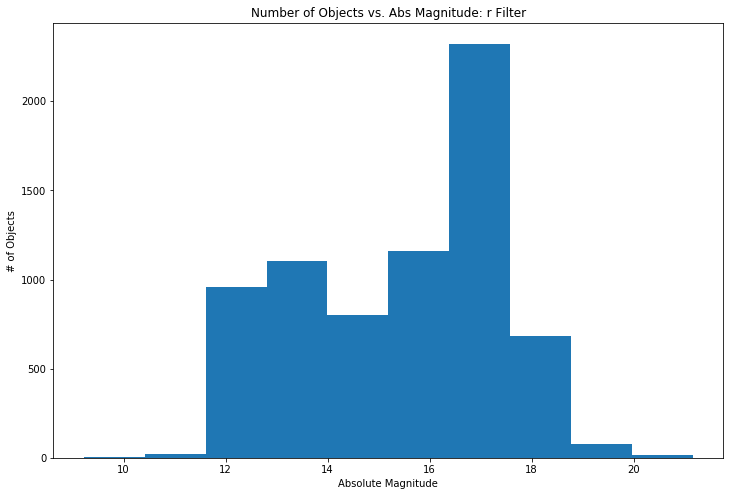

In [103]:
plt.hist(absmag_r)
plt.title('Number of Objects vs. Abs Magnitude: r Filter')
plt.xlabel('Absolute Magnitude')
plt.ylabel('# of Objects')

Text(0, 0.5, '# of Objects')

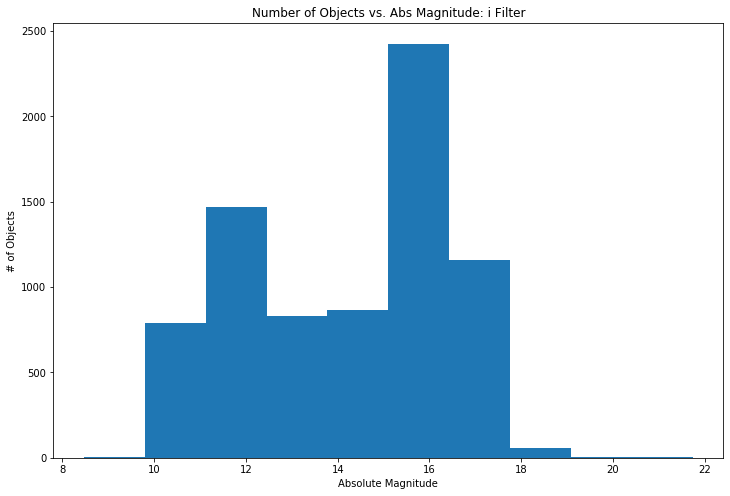

In [104]:
plt.hist(absmag_i)
plt.title('Number of Objects vs. Abs Magnitude: i Filter')
plt.xlabel('Absolute Magnitude')
plt.ylabel('# of Objects')

Text(0, 0.5, '# of Objects')

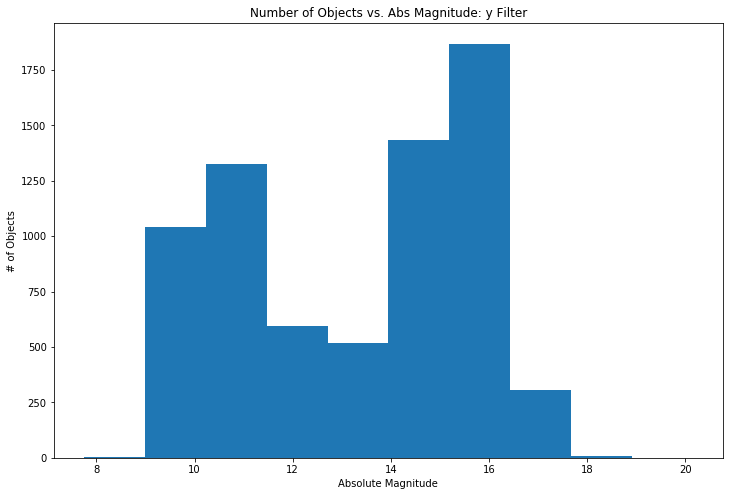

In [105]:
plt.hist(absmag_y)
plt.title('Number of Objects vs. Abs Magnitude: y Filter')
plt.xlabel('Absolute Magnitude')
plt.ylabel('# of Objects')

In [106]:
dist = 1000.0/results['parallax']
v_tan = (4.74*results['pm']*dist)/1000.0
#v_tan

Text(0, 0.5, 'Absolute Magnitude')

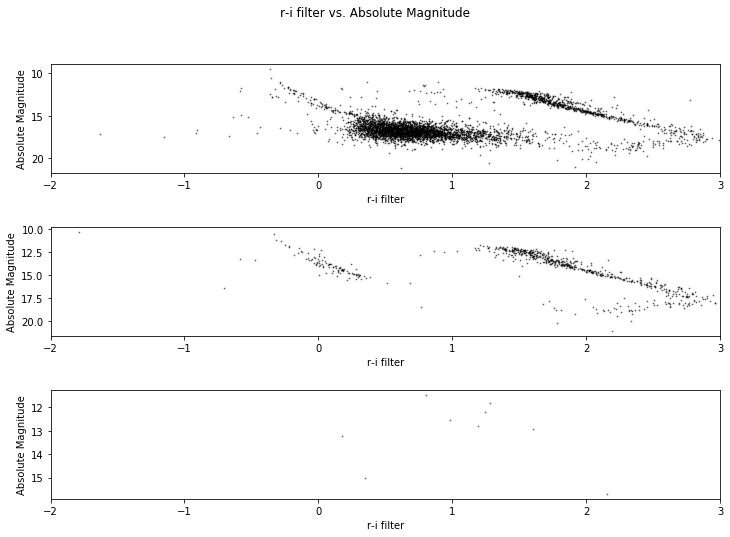

In [107]:
v_tan_sub_low = (v_tan < 20)
v_tan_sub1 = (v_tan > 20) & (v_tan < 40)
v_tan_sub2 = (v_tan > 40) & (v_tan < 60)
v_tan_sub3 = (v_tan > 60) & (v_tan < 100)
v_tan_sub4 = (v_tan > 100) & (v_tan < 200)
v_tan_sub_high = (v_tan > 200)


fig1, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig1.suptitle('r-i filter vs. Absolute Magnitude')
fig1.subplots_adjust(hspace=.5)
ax1.plot(col_ri[v_tan_sub_low],absmag_r[v_tan_sub_low],'ko',markersize=0.8,alpha=0.5)
ax2.plot(col_ri[v_tan_sub2],absmag_r[v_tan_sub2],'ko',markersize=0.8,alpha=0.5)
ax3.plot(col_ri[v_tan_sub_high],absmag_r[v_tan_sub_high],'ko',markersize=0.8,alpha=0.5)
ax1.set_xlim(-2,3)
ax2.set_xlim(-2,3)
ax3.set_xlim(-2,3)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax2.set_ylim(ax2.get_ylim()[::-1])
ax3.set_ylim(ax3.get_ylim()[::-1])

ax1.set_xlabel("r-i filter")
ax2.set_xlabel("r-i filter")
ax3.set_xlabel("r-i filter")
ax1.set_ylabel("Absolute Magnitude")
ax2.set_ylabel("Absolute Magnitude")
ax3.set_ylabel("Absolute Magnitude")
#plt.plot(absmag_r,v_tan_sub3,'o',markersize=0.8,alpha=0.5)

Text(0, 0.5, 'Absolute Magnitude')

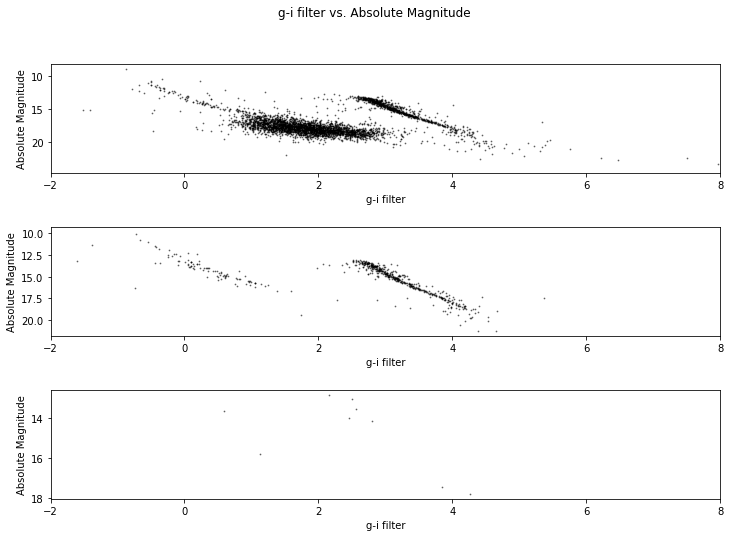

In [108]:
fig2, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig2.suptitle('g-i filter vs. Absolute Magnitude')
fig2.subplots_adjust(hspace=.5)
ax1.plot(col_gi[v_tan_sub_low],absmag_g[v_tan_sub_low],'ko',markersize=0.8,alpha=0.5)
ax2.plot(col_gi[v_tan_sub2],absmag_g[v_tan_sub2],'ko',markersize=0.8,alpha=0.5)
ax3.plot(col_gi[v_tan_sub_high],absmag_g[v_tan_sub_high],'ko',markersize=0.8,alpha=0.5)
ax1.set_xlim(-2,8)
ax2.set_xlim(-2,8)
ax3.set_xlim(-2,8)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax2.set_ylim(ax2.get_ylim()[::-1])
ax3.set_ylim(ax3.get_ylim()[::-1])

ax1.set_xlabel("g-i filter")
ax2.set_xlabel("g-i filter")
ax3.set_xlabel("g-i filter")
ax1.set_ylabel("Absolute Magnitude")
ax2.set_ylabel("Absolute Magnitude")
ax3.set_ylabel("Absolute Magnitude")

Text(0, 0.5, 'Absolute Magnitude')

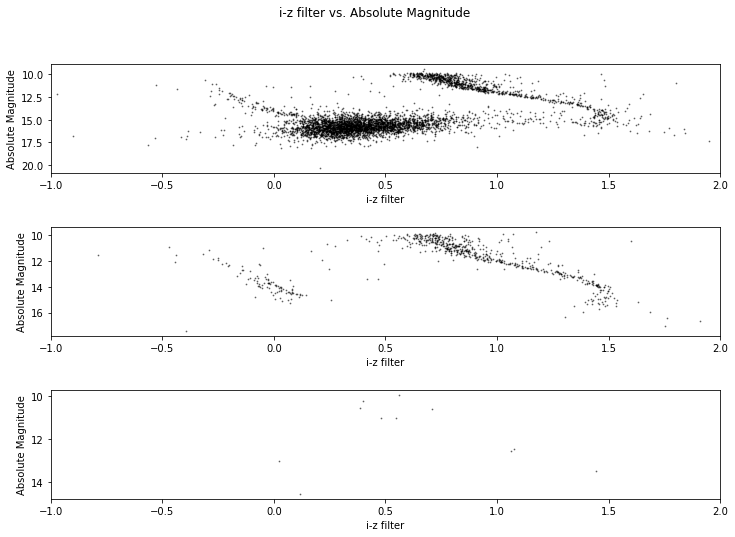

In [109]:
fig3, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig3.suptitle('i-z filter vs. Absolute Magnitude')
ax1.plot(col_iz[v_tan_sub_low],absmag_z[v_tan_sub_low],'ko',markersize=0.8,alpha=0.5)
ax2.plot(col_iz[v_tan_sub2],absmag_z[v_tan_sub2],'ko',markersize=0.8,alpha=0.5)
ax3.plot(col_iz[v_tan_sub_high],absmag_z[v_tan_sub_high],'ko',markersize=0.8,alpha=0.5)
ax1.set_xlim(-1,2)
ax2.set_xlim(-1,2)
ax3.set_xlim(-1,2)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax2.set_ylim(ax2.get_ylim()[::-1])
ax3.set_ylim(ax3.get_ylim()[::-1])

fig3.subplots_adjust(hspace=.5)
ax1.set_xlabel("i-z filter")
ax2.set_xlabel("i-z filter")
ax3.set_xlabel("i-z filter")
ax1.set_ylabel("Absolute Magnitude")
ax2.set_ylabel("Absolute Magnitude")
ax3.set_ylabel("Absolute Magnitude")

Text(0, 0.5, 'Absolute Magnitude')

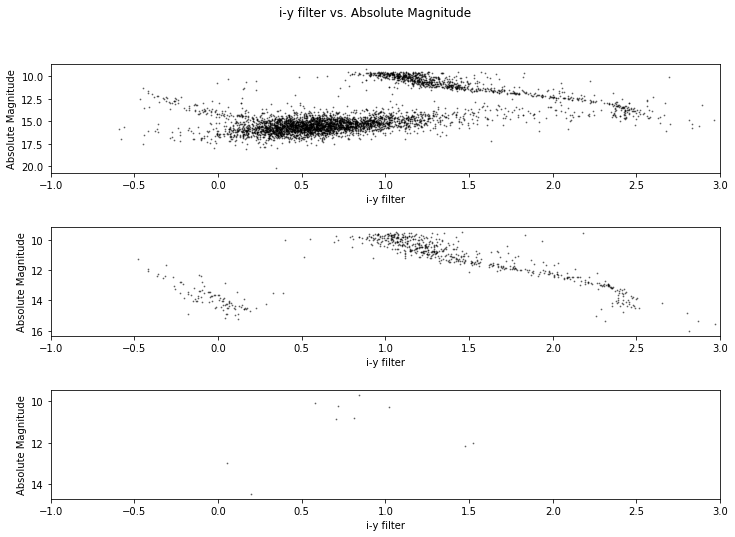

In [110]:
fig4, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig4.suptitle('i-y filter vs. Absolute Magnitude')
ax1.plot(col_iy[v_tan_sub_low],absmag_y[v_tan_sub_low],'ko',markersize=0.8,alpha=0.5)
ax2.plot(col_iy[v_tan_sub2],absmag_y[v_tan_sub2],'ko',markersize=0.8,alpha=0.5)
ax3.plot(col_iy[v_tan_sub_high],absmag_y[v_tan_sub_high],'ko',markersize=0.8,alpha=0.5)
ax1.set_xlim(-1,3)
ax2.set_xlim(-1,3)
ax3.set_xlim(-1,3)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax2.set_ylim(ax2.get_ylim()[::-1])
ax3.set_ylim(ax3.get_ylim()[::-1])


fig4.subplots_adjust(hspace=.5)
ax1.set_xlabel("i-y filter")
ax2.set_xlabel("i-y filter")
ax3.set_xlabel("i-y filter")
ax1.set_ylabel("Absolute Magnitude")
ax2.set_ylabel("Absolute Magnitude")
ax3.set_ylabel("Absolute Magnitude")

Text(0, 0.5, '# of Objects')

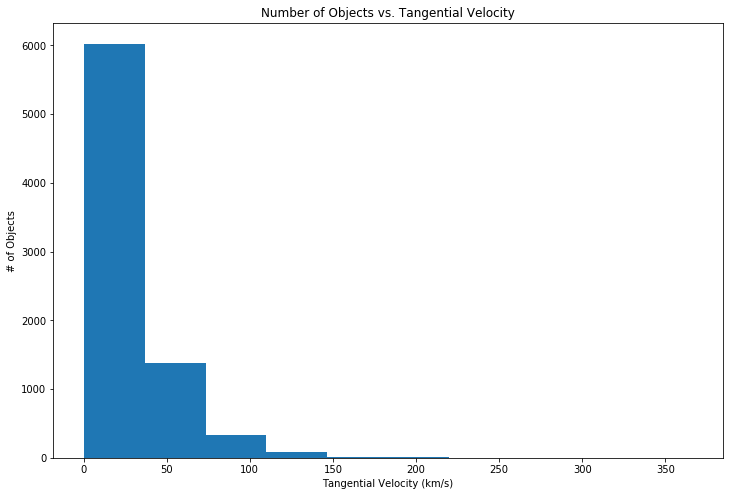

In [111]:
plt.hist(v_tan)
plt.title('Number of Objects vs. Tangential Velocity')
plt.xlabel('Tangential Velocity (km/s)')
plt.ylabel('# of Objects')

(11.0, 23.0)

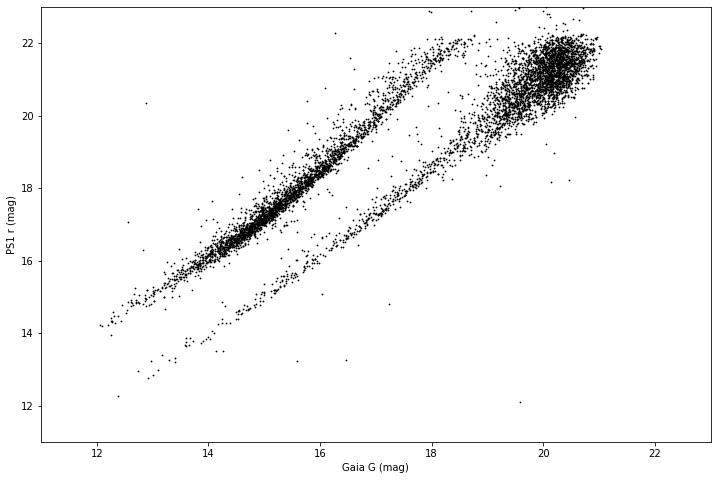

In [112]:
#check on Gaia - PS1 correlation. 
plt.plot(results['phot_g_mean_mag'],results['g_mean_psf_mag'],'ko',markersize=0.8)
plt.xlabel('Gaia G (mag)')
plt.ylabel('PS1 r (mag)')
plt.ylim(11.0,23.0)
plt.xlim(11.0,23.0)

Gaia magnitude (the broad-band G) is correlated with PS1 r magnitude, as we would hope. The few outliers may be bad pairings but have no effect on our analysis.  Some astrophysics is also evident due to color effects. 

(-2, 5)

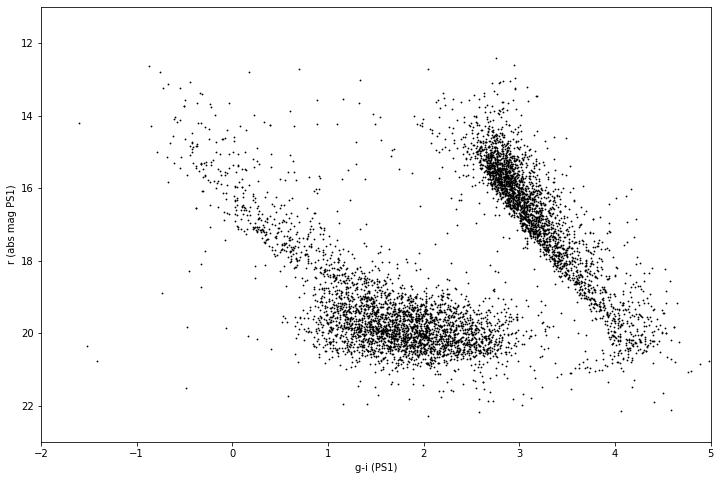

In [113]:
#check color mag PS1 correlation. 
plt.plot(col_gi,results['r_mean_psf_mag'],'ko',markersize=0.8)
plt.xlabel('g-i (PS1)')
plt.ylabel('r (abs mag PS1)')
plt.ylim(23,11.0)
plt.xlim(-2,5)



In [114]:
#LSST saturation for 15 second exposure in 0.7 arcsec seeing according to LSST Science Book
#u, g, r, i, z, y =
#14.7, 15.7, 15.8, 15.8, 15.3 and 13.9
bright15=[14.7,15.7,15.8,15.8,15.3,13.9]
bright30=bright15+2.5*np.log10(30.0/15.0)
bright01=bright15+2.5*np.log10(1.0/15.0)
bright03=bright15+2.5*np.log10(3.0/15.0)
bright05=bright15+2.5*np.log10(5.0/15.0)
#August 2020 report includes simulations of 1s and 5s short exposures. 
# See page 40, PSTN-051 https://pstn-051.lsst.io


In [115]:
#look at this just to make sure it went the right direction.  
bright01


array([11.75977185, 12.75977185, 12.85977185, 12.85977185, 12.35977185,
       10.95977185])

/Applications/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/Applications/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


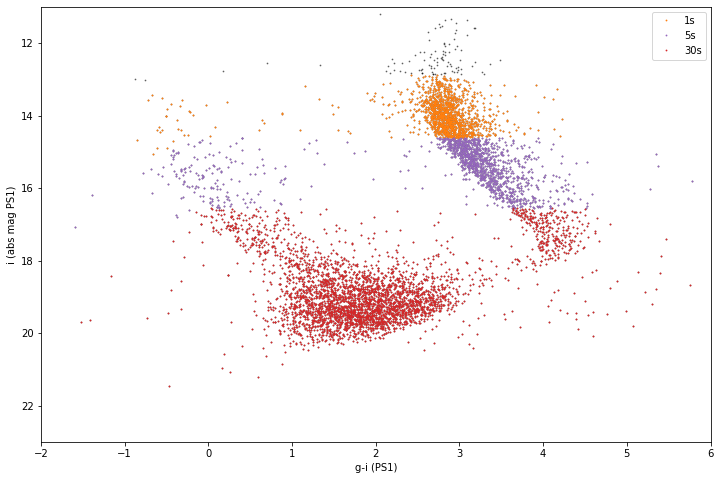

In [116]:
igood = (mag_i > bright30[3]) & (mag_g > bright30[1])
ishort = (mag_i > bright05[3]) & (mag_g > bright05[1]) & ((mag_i < bright30[3]) | (mag_g < bright30[1]))
iveryshort = (mag_i > bright01[3]) & (mag_g > bright01[1]) & ((mag_i < bright05[3]) | (mag_g < bright05[1]))
#
plt.plot(col_gi,mag_i,'ko',markersize=0.8,alpha=0.5)
plt.plot(col_gi[iveryshort],mag_i[iveryshort],'o',color='C1',markersize=0.8,label='1s')
plt.plot(col_gi[ishort],mag_i[ishort],'o',color='C4',markersize=0.8,label='5s')
plt.plot(col_gi[igood],mag_i[igood],'o',color='C3',markersize=0.8,label='30s')
plt.xlabel('g-i (PS1)')
plt.ylabel('i (abs mag PS1)')
plt.ylim(23,11.0)
plt.xlim(-2,6)
plt.legend();

The colors here show that our selection is working... the faint stars (red) will not be saturated in a 30s exposoure, the others will. The purple become unsaturated in the 5s exposure. Orange stars are only unsaturated in the 1s exposure. Note the the parallax error ratio cut imposes an implicit distance limit so this is not a fir representation of all stars observed by Gaia, PS1 or LSST.  

From now on, let's look at absolute magnitudes. Warning: Reddening is significant as you can see in the broad main sequence, especially for the bluer (g,r) colors.

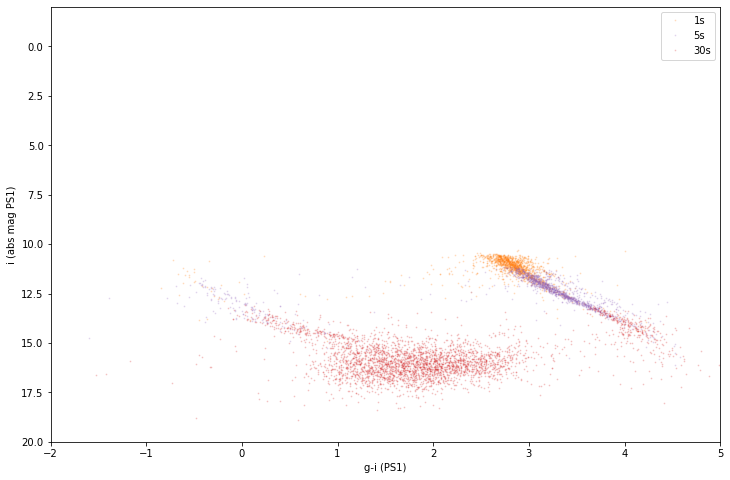

In [117]:
igood = (mag_i > bright30[3]) & (mag_g > bright30[1])
ishort = (mag_i > bright05[3]) & (mag_g > bright05[1]) & ((mag_i < bright30[3]) | (mag_g < bright30[1]))
iveryshort = (mag_i > bright01[3]) & (mag_g > bright01[1]) & ((mag_i < bright05[3]) | (mag_g < bright05[1]))
#
#plt.plot(col_gi,absmag_i,'ko',markersize=0.5,alpha=0.1)
plt.plot(col_gi[iveryshort],absmag_i[iveryshort],'o',color='C1',markersize=0.8,label='1s',alpha=0.2)
plt.plot(col_gi[ishort],absmag_i[ishort],'o',color='C4',markersize=0.8,label='5s',alpha=0.2)
plt.plot(col_gi[igood],absmag_i[igood],'o',color='C3',markersize=0.8,label='30s',alpha=0.2)
plt.xlabel('g-i (PS1)')
plt.ylabel('i (abs mag PS1)')
plt.ylim(20,-2.0)
plt.xlim(-2,5)
plt.legend();

The key results are that M dwarfs (and white dwarfs) with high quality parallaxes will be the only ones that the main LSST survey (30s exposure) will directly measure. (They're within 500 pc, see plots below.) If we want a high quality sample of GK dwarfs directly on the LSST system with Gaia parallaxes (or similar ancillary data), then we need the 5s exposures. The 1s would extend up to the main sequence turnoff, F stars, etc.  

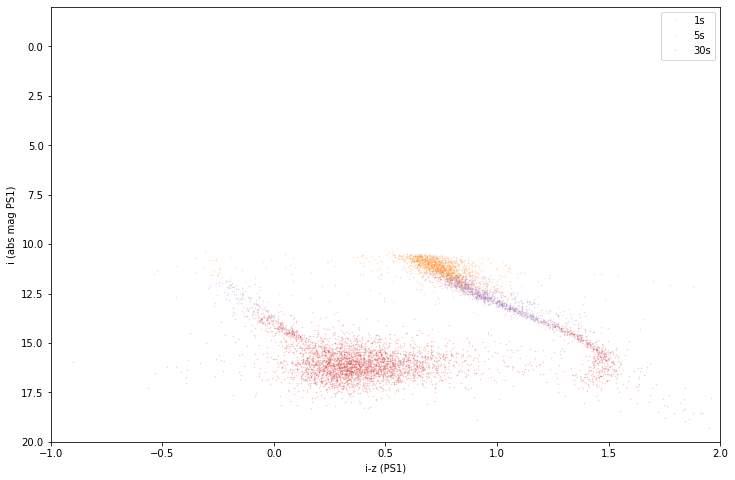

In [118]:
igood = (mag_i > bright30[3]) & (mag_z > bright30[4])
ishort = (mag_i > bright05[3]) & (mag_z > bright05[4]) & ((mag_i < bright30[3]) | (mag_z < bright30[4]))
iveryshort = (mag_i > bright01[3]) & (mag_z > bright01[4]) & ((mag_i < bright05[3]) | (mag_z < bright05[4]))
#
#plt.plot(col_iz,absmag_i,'ko',markersize=0.6,alpha=0.1)
plt.plot(col_iz[iveryshort],absmag_i[iveryshort],'o',color='C1',markersize=0.6,label='1s',alpha=0.2)
plt.plot(col_iz[ishort],absmag_i[ishort],'o',color='C4',markersize=0.6,label='5s',alpha=0.2)
plt.plot(col_iz[igood],absmag_i[igood],'o',color='C3',markersize=0.6,label='30s',alpha=0.2)
plt.xlabel('i-z (PS1)')
plt.ylabel('i (abs mag PS1)')
plt.ylim(20,-2.0)
plt.xlim(-1,2)
plt.legend();

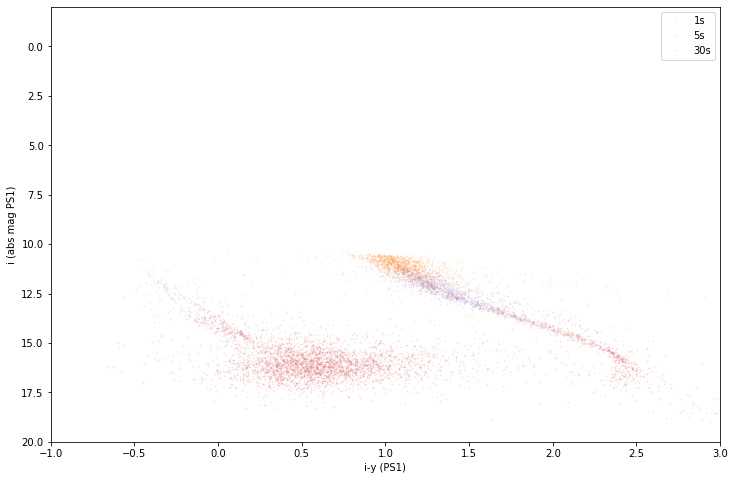

In [119]:
igood = (mag_i > bright30[3]) & (mag_y > bright30[5])
ishort = (mag_i  > bright05[3]) & (mag_y> bright05[5]) & ((mag_i  < bright30[3]) | (mag_y < bright30[5]))
iveryshort = (mag_i  > bright01[3]) & (mag_y > bright01[5]) & ((mag_i  < bright05[3]) | (mag_y < bright05[5]))
#
#plt.plot(col_iy,absmag_i,'ko',markersize=0.8,alpha=0.1)
plt.plot(col_iy[iveryshort],absmag_i[iveryshort],'o',color='C1',markersize=0.8,label='1s',alpha=0.1)
plt.plot(col_iy[ishort],absmag_i[ishort],'o',color='C4',markersize=0.8,label='5s',alpha=0.1)
plt.plot(col_iy[igood],absmag_i[igood],'o',color='C3',markersize=0.8,label='30s',alpha=0.1)
plt.xlabel('i-y (PS1)')
plt.ylabel('i (abs mag PS1)')
plt.ylim(20,-2.0)
plt.xlim(-1,3)
plt.legend()

Note that i-y is tighter because reddening for stars at ~1kpc is important!

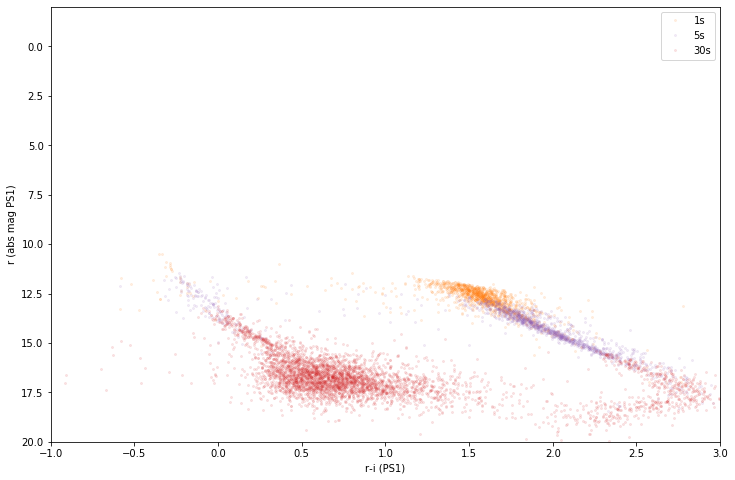

In [120]:
igood = (mag_i > bright30[3]) & (mag_r > bright30[2])
ishort = (mag_i > bright05[3]) & (mag_r > bright05[2]) & ((mag_i < bright30[3]) | (mag_r < bright30[2]))
iveryshort = (mag_i > bright01[3]) & (mag_r > bright01[2]) & ((mag_i < bright05[3]) | (mag_r < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(col_ri[iveryshort],absmag_r[iveryshort],'o',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(col_ri[ishort],absmag_r[ishort],'o',color='C4',markersize=2,label='5s',alpha=0.1)
plt.plot(col_ri[igood],absmag_r[igood],'o',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r-i (PS1)')
plt.ylabel('r (abs mag PS1)')
plt.ylim(20,-2.0)
plt.xlim(-1,3)
plt.legend()
plt.savefig('LSST-Gaia-PS1-ri-mr.png');

In [121]:
mask_not_plane=(np.abs(results['b'])> 20) 

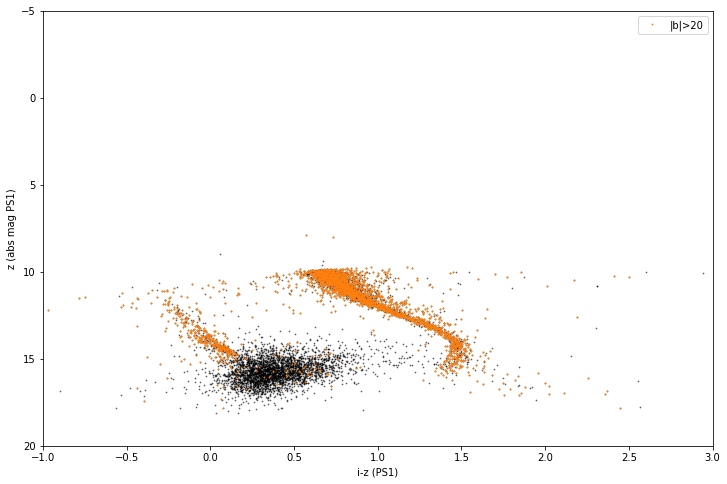

In [122]:
plt.plot(col_iz,absmag_z,'ko',markersize=0.8,alpha=0.5)
plt.plot(col_iz[mask_not_plane],absmag_z[mask_not_plane],'o',color='C1',markersize=0.8,label='|b|>20')
plt.xlabel('i-z (PS1)')
plt.ylabel('z (abs mag PS1)')
plt.ylim(20,-5.0)
plt.xlim(-1,3)
plt.legend();

In [123]:
distance = 1000.0/results['parallax']

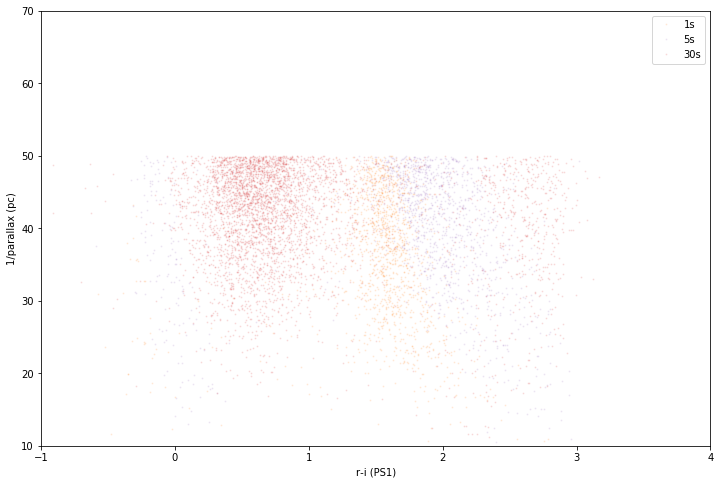

In [124]:
igood = (mag_i > bright30[3]) & (mag_r > bright30[2])
ishort = (mag_i > bright05[3]) & (mag_r > bright05[2]) & ((mag_i < bright30[3]) | (mag_r < bright30[2]))
iveryshort = (mag_i > bright01[3]) & (mag_r > bright01[2]) & ((mag_i < bright05[3]) | (mag_r < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(col_ri[iveryshort],distance[iveryshort],'.',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(col_ri[ishort],distance[ishort],'.',color='C4',markersize=2,label='5s',alpha=0.1)
plt.plot(col_ri[igood],distance[igood],'.',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r-i (PS1)')
plt.ylabel('1/parallax (pc)')
plt.ylim(10,70)
plt.xlim(-1,4)
plt.legend()
plt.savefig('LSST-Gaia-PS1-ri-distance.png');

Some bad measurments with 0 color have crept in and should be ignored.  I think it is due to the fits format changing "no measurement" to 1e20, and 1e20-1e20 = 0 !!!! Not worth fixing.  

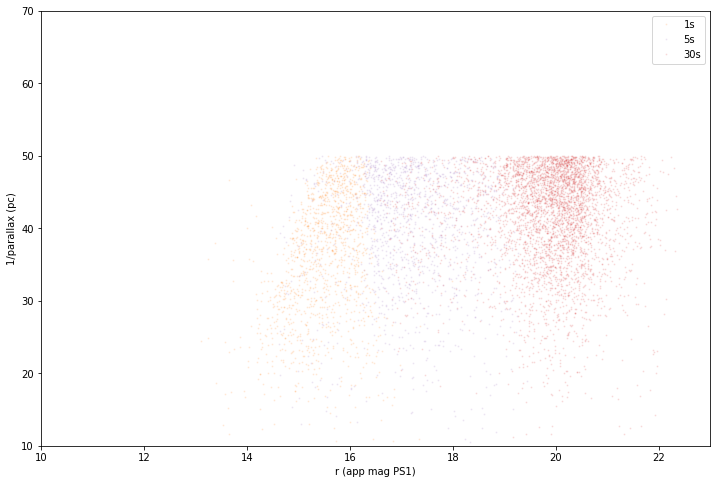

In [125]:
igood = (mag_i > bright30[3]) & (mag_r > bright30[2])
ishort = (mag_i > bright05[3]) & (mag_r > bright05[2]) & ((mag_i < bright30[3]) | (mag_r < bright30[2]))
iveryshort = (mag_i > bright01[3]) & (mag_r > bright01[2]) & ((mag_i < bright05[3]) | (mag_r < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(mag_r[iveryshort],distance[iveryshort],'.',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(mag_r[ishort],distance[ishort],'.',color='C4',markersize=2,label='5s',alpha=0.1)
plt.plot(mag_r[igood],distance[igood],'.',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r (app mag PS1)')
plt.ylabel('1/parallax (pc)')
plt.ylim(10,70)
plt.xlim(10,23)
plt.legend()
plt.savefig('LSST-Gaia-PS1-mr-distance.png');

Maybe worth noting that we have limited ourselves to 300,000 sources (or fewer, depending on the notebook you ran) so rare objects would also be present.  